### Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men
Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team

In [1]:
#step 1
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 2
data_source_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3
user_data = pd.read_csv(data_source_url, sep='|')
print(user_data)


     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [3]:
# Step 4
average_age_by_occupation = user_data[['occupation', 'age']].groupby('occupation').mean()
print(average_age_by_occupation)


                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


In [4]:
# Step 5
occupation_gender_df = user_data[['occupation', 'gender']]
male_users = occupation_gender_df[occupation_gender_df['gender'] == 'M']

# Counting total users and male users by occupation
total_by_occupation = occupation_gender_df.groupby('occupation').size()
male_by_occupation = male_users.groupby('occupation').size()

# Calculating the male-to-total ratio
male_ratio_by_occupation = male_by_occupation / total_by_occupation

# Sorting the ratio in descending order by gender
sorted_male_ratio = male_ratio_by_occupation.sort_values(ascending=False)
print(sorted_male_ratio)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [5]:
# Step 6
max_age_by_occupation = user_data[['occupation', 'age']].groupby('occupation').max()
print("Maximum age")
print(max_age_by_occupation)

min_age_by_occupation = user_data[['occupation', 'age']].groupby('occupation').min()
print("\n Minimum age")
print(min_age_by_occupation)


Maximum age
               age
occupation        
administrator   70
artist          48
doctor          64
educator        63
engineer        70
entertainment   50
executive       69
healthcare      62
homemaker       50
lawyer          53
librarian       69
marketing       55
none            55
other           64
programmer      63
retired         73
salesman        66
scientist       55
student         42
technician      55
writer          60

 Minimum age
               age
occupation        
administrator   21
artist          19
doctor          28
educator        23
engineer        22
entertainment   15
executive       22
healthcare      22
homemaker       20
lawyer          21
librarian       23
marketing       24
none            11
other           13
programmer      20
retired         51
salesman        18
scientist       23
student          7
technician      21
writer          18


In [6]:
# Step 7
average_age_by_occupation_gender = user_data[['occupation', 'gender', 'age']].groupby(['occupation', 'gender']).mean('age')
average_age_by_occupation_gender


age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [8]:
# Step 8
occupation_gender_age_df = user_data[['occupation', 'gender', 'age']]
gender_percentage_by_occupation = occupation_gender_age_df.groupby('occupation')['gender'].value_counts(normalize=True) * 100
gender_percentage_by_occupation


occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

#### Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team 

In [9]:
# Step 1
import pandas as pd

# Step 2 and 3
euro_2012_data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

# Step 4
goals_column = euro_2012_data[['Goals']]
goals_column


,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [10]:
# Step 5
total_teams = euro_2012_data['Team'].nunique()
print(total_teams)


16


In [11]:
# Step 6
number_of_columns = euro_2012_data.shape[1]
print(number_of_columns)


35


In [12]:
# Step 7
disciplinary_records = euro_2012_data[['Team', 'Yellow Cards', 'Red Cards']]

disciplinary_records


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [13]:
# Step 8
sorted_discipline = euro_2012_data[['Team', 'Red Cards', 'Yellow Cards']].sort_values(by=['Red Cards', 'Yellow Cards'])
sorted_discipline


,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [15]:
# Step 9
average_yellow_cards = disciplinary_records['Yellow Cards'].mean()
print(f"Average Yellow Cards: {average_yellow_cards}")


Average Yellow Cards: 7.4375


In [16]:
# Step 10
teams_with_goals_above_six = euro_2012_data[['Team', 'Goals']].loc[euro_2012_data['Goals'] > 6]
teams_with_goals_above_six


,Team,Goals
5,Germany,10
13,Spain,12


In [17]:
# Step 11
teams_starting_with_G = euro_2012_data[euro_2012_data['Team'].str.startswith('G')]
teams_starting_with_G


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [58]:
## step 12
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [18]:
# Step 12
first_seven_columns = euro_2012_data.iloc[:, :7]
first_seven_columns


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# Step 14
selected_teams = (euro_2012_data['Team'] == 'England') | (euro_2012_data['Team'] == 'Italy') | (euro_2012_data['Team'] == 'Russia')

team_shooting_accuracy = euro_2012_data.loc[selected_teams, ['Team', 'Shooting Accuracy']]
team_shooting_accuracy


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Q3 Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [20]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
data_col1 = pd.Series(np.random.randint(1, 5, size=100), name='col1')
data_col2 = pd.Series(np.random.randint(1, 4, size=100), name='col2')
data_col3 = pd.Series(np.random.randint(10000, 30001, size=100), name='col3')

# Step 3
combined_df = pd.concat([data_col1, data_col2, data_col3], axis=1)
combined_df


,col1,col2,col3
0,2,1,18334
1,2,1,12633
2,4,3,20752
3,1,1,24759
4,3,2,16282
...,...,...,...
95,4,3,11894
96,2,1,23012
97,2,2,26099
98,3,3,14207


In [21]:
# Step 4
combined_df.rename(columns={"col1": "bedrs", "col2": "bathrs", "col3": "price_sqr_meter"}, inplace=True)
combined_df


,bedrs,bathrs,price_sqr_meter
0,2,1,18334
1,2,1,12633
2,4,3,20752
3,1,1,24759
4,3,2,16282
...,...,...,...
95,4,3,11894
96,2,1,23012
97,2,2,26099
98,3,3,14207


In [22]:
# Step 5
combined_columns = combined_df['bedrs'].astype(str) + combined_df['bathrs'].astype(str) + combined_df['price_sqr_meter'].astype(str)
combined_columns


0     2118334
1     2112633
2     4320752
3     1124759
4     3216282
       ...   
95    4311894
96    2123012
97    2226099
98    3314207
99    2217563
Length: 100, dtype: object

step 6:

Yes, the index is going till 99

In [23]:
# Step 7
expanded_index = combined_columns.reindex(range(300))
expanded_index


0      2118334
1      2112633
2      4320752
3      1124759
4      3216282
        ...   
295        NaN
296        NaN
297        NaN
298        NaN
299        NaN
Length: 300, dtype: object

Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [25]:
# Step 1
import pandas as pd

# Step 2
weather_data = pd.read_csv("C:\\Users\\vrajk\\Downloads\\wind.txt", delimiter='\s+')

# Step 3
weather_data.rename(columns={"Yr": "Year", "Mo": "Month", "Dy": "Day"}, inplace=True)
weather_data


,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [26]:
# Step 4
def adjust_years():
    weather_data['Year'] += 1900

adjust_years()  # Fix year by converting it to a 4-digit format

weather_data


,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [28]:
# Step 5
weather_data.index = pd.to_datetime(pd.DataFrame({
    'Year': weather_data['Year'],
    'Month': weather_data['Month'],
    'Day': weather_data['Day']
}))

# Drop the original columns now that the index is set
weather_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

weather_data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [29]:
# Step 6
missing_values_count = weather_data.isna().sum()
missing_values_count


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [30]:
# Entire record
total_missing_values = weather_data.isnull().sum().sum()
total_missing_values


31

In [32]:
## step 7 computing missing values
data.notnull().sum().sum()

78857

In [33]:
# Step 8: Compute the mean of all numeric columns
average_value = weather_data.mean().mean()
average_value


10.227982360836938

In [34]:
# Step 9: Compute summary statistics
summary_stats = pd.concat([weather_data.min(), weather_data.max(), weather_data.mean(), weather_data.std()], axis=1)
summary_stats.rename(columns={0: 'Min', 1: 'Max', 2: 'Mean', 3: 'Std'}, inplace=True)

summary_stats


,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [36]:
# Step 10: Compute row-wise summary statistics
row_stats = pd.concat([weather_data.min(axis=1), weather_data.max(axis=1), weather_data.mean(axis=1), weather_data.std(axis=1)], axis=1)
row_stats.rename(columns={0: 'Min', 1: 'Max', 2: 'Mean', 3: 'Std'}, inplace=True)

row_stats


,Min,Max,Mean,Std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [37]:
# Step 11: Compute the average of data for January
wind_jan = weather_data[weather_data.index.month == 1].mean()
wind_jan


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [38]:
# Step 12: Resample the data by year and forward-fill missing values
yearly = weather_data.resample('Y').ffill()

yearly


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41
1970-12-31,8.38,0.37,9.59,2.62,1.75,0.08,4.83,2.13,2.54,1.17,3.67,7.21


In [39]:
# Step 13: Resample the data by month and forward-fill missing values
monthly = weather_data.resample('M').ffill()

monthly


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67
1978-11-30,15.34,4.54,14.75,3.50,4.54,4.96,7.50,2.42,4.96,3.75,4.92,11.50


In [41]:
# Step 14: Resample the data by week and forward-fill missing values
weekly = weather_data.resample('W').ffill()

weekly


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08
1978-12-24,8.67,5.63,12.12,4.79,5.09,5.91,12.25,9.25,10.83,11.71,11.92,31.71


In [42]:
# Step 15: Compute weekly statistics for the first 52 weeks
weekly_stats = weekly[:52]

# Concatenate mean, max, and standard deviation
weekly_summary = pd.concat([
    weekly_stats.mean(), 
    weekly_stats.max(), 
    weekly_stats.mean(),  # Note: This is duplicated and can be removed or replaced if needed
    weekly_stats.std()
], axis=1)

# Rename columns for clarity
weekly_summary.rename(columns={0: 'Mean', 1: 'Max', 2: 'Mean', 3: 'Std'}, inplace=True)

weekly_summary


,Mean,Max,Mean,Std
RPT,12.140000,25.80,12.140000,5.360926
VAL,10.626538,23.91,10.626538,4.782553
ROS,11.261731,22.42,11.261731,4.714533
KIL,6.862549,17.54,6.862549,3.743912
SHA,11.242745,24.08,11.242745,4.770084
BIR,7.946346,19.70,7.946346,3.906412
DUB,9.912353,22.00,9.912353,4.695142
CLA,9.305385,20.25,9.305385,4.022109
MUL,8.823077,21.46,8.823077,4.181664
CLO,9.939615,20.04,9.939615,4.077699


Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [43]:
# Step 1
import pandas as pd

# Step 2 and 3: Import the dataset and assign it to a variable
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')

# Display the first 10 entries
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [44]:
# Step 5: Number of observations or rows
print(f"The number of rows is: {chipo.shape[0]}")


The number of rows is: 4622


In [45]:
# Step 6: Number of columns
print(f"The number of columns is: {chipo.shape[1]}")


The number of columns is: 5


In [48]:
# Step 7: Print the name of all columns
for col in chipo.columns:
    print(col)


order_id
quantity
item_name
choice_description
item_price


In [49]:
# step 8

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [50]:
# Step 9: Find the most-ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()

print(f"The most ordered item is: {most_ordered_item}")
print(f"Total quantity ordered for '{most_ordered_item}': {most_ordered_quantity}")


The most ordered item is: Chicken Bowl
Total quantity ordered for 'Chicken Bowl': 761


In [51]:
# Step 10: For the most-ordered item, get the total quantity ordered
most_ordered_item_quantity = chipo.groupby('item_name')['quantity'].sum().max()

print(f"Total quantity ordered for the most ordered item: {most_ordered_item_quantity}")


Total quantity ordered for the most ordered item: 761


In [53]:
# Step 11: Find the most ordered item in the 'choice_description' column
desc_item = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(1)

# Print the most ordered choice description and its quantity
most_ordered_desc = desc_item.index[0]
quantity = desc_item.values[0]

print(f"The most ordered choice description is: '{most_ordered_desc}' with a total quantity of {quantity}.")


The most ordered choice description is: '[Diet Coke]' with a total quantity of 159.


In [54]:
# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print(f'Number of items ordered in total = {total_items_ordered}')


Number of items ordered in total = 4972


In [55]:
# Step 13: Convert the item price to a float and check its type

# Print the previous data type
print(f"The previous data type was: {chipo['item_price'].dtype}")

# Convert item_price from string to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Print the new data type
print(f"The new data type is: {chipo['item_price'].dtype}")


The previous data type was: object
The new data type is: float64


In [56]:
# Step 14: Calculate the total revenue
revenue = (chipo['quantity'] * chipo['item_price']).sum()

print(f'Total revenue is ${revenue:.2f}')


Total revenue is $39237.02


In [57]:
# Step 15: Calculate the total number of orders
orders = chipo['order_id'].nunique()

print(f'Total number of orders is {orders}')


Total number of orders is 1834


In [58]:
# Step 16: Calculate the average revenue per order

# Create a temporary DataFrame with relevant columns
temp_chipo = chipo[['order_id', 'quantity', 'item_price']]

# Calculate revenue for each row
temp_chipo['revenue'] = temp_chipo['quantity'] * temp_chipo['item_price']

# Group by order_id and sum up the revenue for each order
order_revenue = temp_chipo.groupby('order_id')['revenue'].sum()

# Calculate the average revenue per order
avg_amt = order_revenue.mean()

print(f'The average amount per order is ${avg_amt:.2f}')


The average amount per order is $21.39


C:\Users\vrajk\AppData\Local\Temp\ipykernel_18352\43027641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_chipo['revenue'] = temp_chipo['quantity'] * temp_chipo['item_price']


In [59]:
# Step 17: Count the number of different items sold
items_sold = chipo['item_name'].nunique()

print(f'Total different items sold = {items_sold}')


Total different items sold = 50


###  Question 6 
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\vrajk\\Downloads\\us-marriages-divorces-1867-2014.csv")

# Display the first few rows of the dataset
print(data.head())


   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


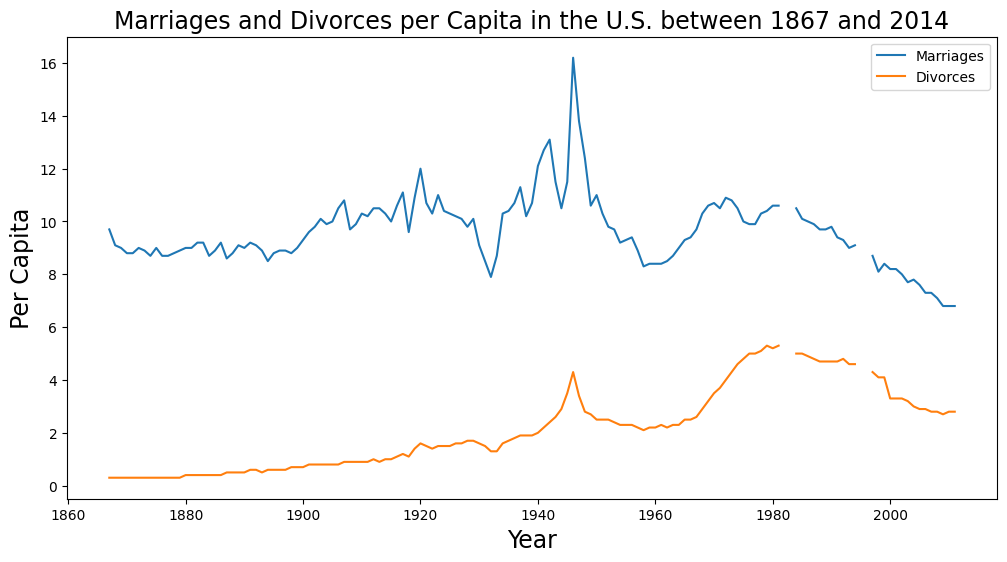

In [63]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Optional: Specify figure size

# Plot the data
data.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'], 
          ax=ax, label=['Marriages', 'Divorces'])

# Customize the plot
plt.title('Marriages and Divorces per Capita in the U.S. between 1867 and 2014', color='k', fontsize=17)
plt.xlabel('Year', color='k', fontsize=17)
plt.ylabel('Per Capita', color='k', fontsize=17)
plt.legend(loc='best')  # Add a legend to the plot

# Show the plot
plt.show()


<img src="./q7.png" width="500"/>

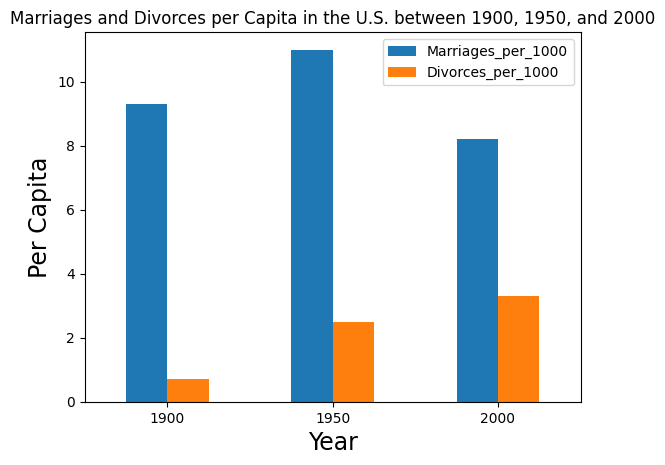

In [64]:
# Filter data for the years 1900, 1950, and 2000
filters = (data['Year'] == 1900) | (data['Year'] == 1950) | (data['Year'] == 2000) 
df = data.loc[filters, ['Year', 'Marriages_per_1000', 'Divorces_per_1000']]

# Set the 'Year' column as index for better plotting
df.set_index('Year', inplace=True)

# Plot the data
df.plot.bar()
plt.title("Marriages and Divorces per Capita in the U.S. between 1900, 1950, and 2000", color='k')
plt.xlabel('Year', color='k', fontsize=17)
plt.ylabel('Per Capita', color='k', fontsize=17)

# Customize x-ticks to match the years
plt.xticks(ticks=range(len(df.index)), labels=df.index, rotation=0)

# Show the plot
plt.show()

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!"/>

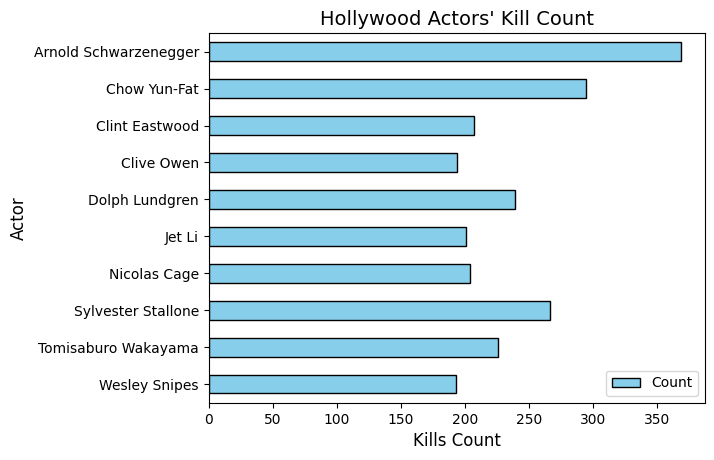

Text(0, 0.5, 'Actor')

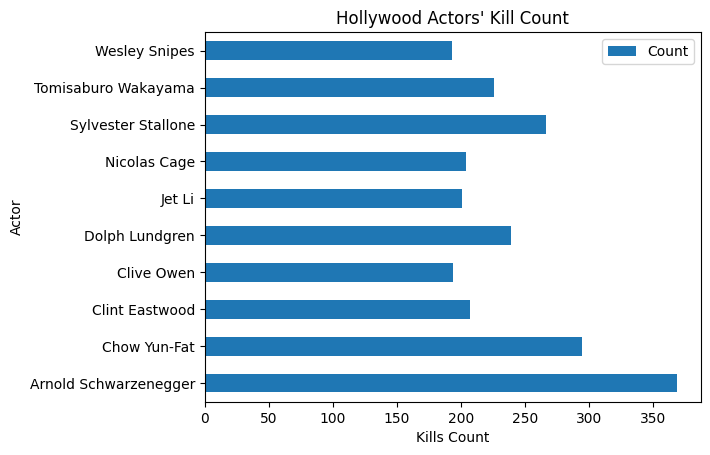

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\vrajk\\Downloads\\actor_kill_counts.csv")

# Plot horizontal bar chart
data.plot.barh(x='Actor', y='Count', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Hollywood Actors\' Kill Count', fontsize=14, color='k')
plt.xlabel('Kills Count', color='k', fontsize=12)
plt.ylabel('Actor', color='k', fontsize=12)
plt.gca().invert_yaxis()  # Optional: to show the highest kill count on top

# Show the plot
plt.show()
data = pd.read_csv('actor_kill_counts.csv')
data.plot.barh(x='Actor', y='Count')
plt.title('Hollywood Actors\' Kill Count')
plt.xlabel('Kills Count', color = 'k')
plt.ylabel('Actor', color = 'k')

### Question 9
reate a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

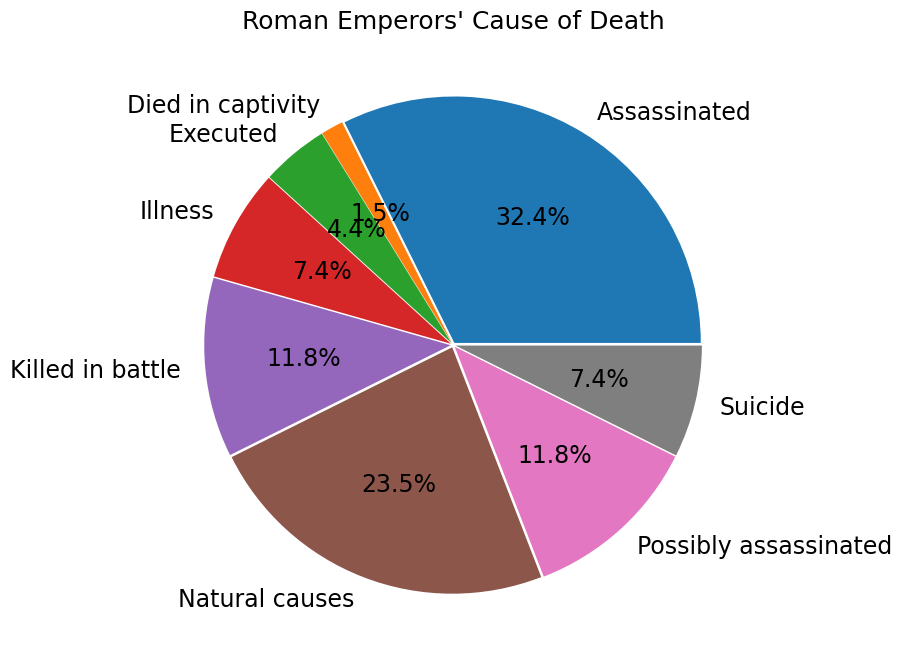

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\vrajk\\Downloads\\roman-emperor-reigns.csv")

# Group by 'Cause_of_Death' and count occurrences
death_cause = df.groupby("Cause_of_Death")['Emperor'].count()

# Plot pie chart
plt.figure(figsize=(10, 8))  # Optional: specify figure size for better clarity
death_cause.plot.pie(autopct="%.1f%%", fontsize=17, ylabel='', explode=[0.01]*len(death_cause))

# Customize the plot
plt.title("Roman Emperors' Cause of Death", fontsize=18, color='k')

# Show the plot
plt.show()


### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

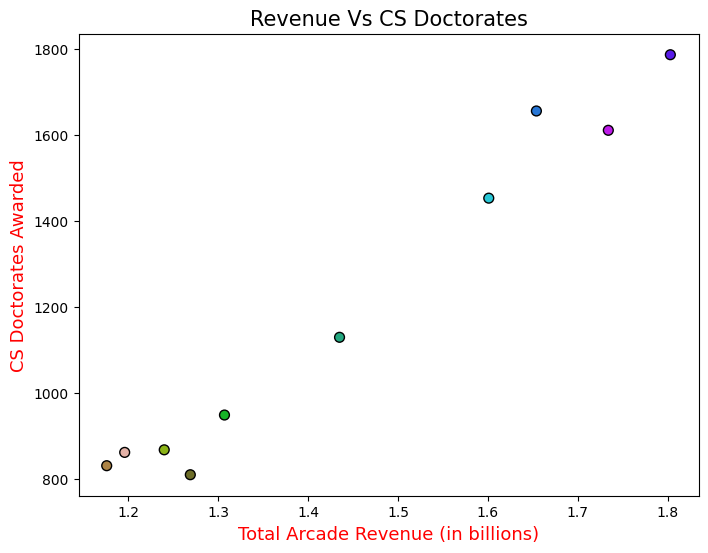

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
revenue = pd.read_csv("C:\\Users\\vrajk\\Downloads\\arcade-revenue-vs-cs-doctorates.csv")

# Define custom colors
colors = ['#E4B2A7', '#AD8446', '#6D6D28', '#8BB317', '#17B328', '#24A880', '#28C7D6', '#2877D6', '#591BE8', '#BD1BE8']

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better clarity
plt.scatter(x=revenue['Total Arcade Revenue (billions)'], 
            y=revenue['Computer Science Doctorates Awarded (US)'],
            c=colors, s=50, edgecolor='k')  # Add edge color for better visibility

# Customize the plot
plt.title('Revenue Vs CS Doctorates', fontsize=15, color='k')
plt.xlabel('Total Arcade Revenue (in billions)', color='Red', fontsize=13)
plt.ylabel('CS Doctorates Awarded', color='Red', fontsize=13)

# Show the plot
plt.show()
